## Diabetes Prediction

In [9]:
import pandas as pd 

df = pd.read_csv('data/diabetes.csv')
df_original = df.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Exploratory Data Analysis

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
# Prints Descriptive Statistics
# df.describe()
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### Data Preprocessing

In [12]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
# Encode Categorical Data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Set Feature and Target

In [14]:
col = df.columns.to_list()
col.remove('Outcome')

# set feature
x = df[col]

# set target
y = df['Outcome']

#### Set Training and Testing Data

In [17]:
# Set Training and Testing Data (70:30)
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test  = train_test_split(x , y, shuffle = True, test_size=0.3, random_state=1)

# Show the Training and Testing Data
print(f"""{x_train.shape}  \n{x_test.shape}  \n{y_train.shape}  \n{y_test.shape} """)

(537, 8)  
(231, 8)  
(537,)  
(231,) 


#### Custom Method

In [20]:
list_model = []
list_acc = []
list_precision = []
list_recall = []

def evaluation(m):
    model = m
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = round(metrics.accuracy_score(y_test, y_pred),2)
    prec = round(metrics.precision_score(y_test, y_pred),2)
    recall = round(metrics.recall_score(y_test, y_pred),2)
    list_model.append(str(model).split('(')[0])
    list_acc.append(acc)
    list_precision.append(prec)
    list_recall.append(recall)
    print(f"""Accuracy : {acc} \nPrecision : {prec} \nRecall : {recall}""")

In [21]:
from sklearn.svm import SVC
from sklearn import metrics
evaluation(SVC())

Accuracy : 0.77 
Precision : 0.83 
Recall : 0.47


In [22]:
from sklearn.neighbors import KNeighborsClassifier
evaluation(KNeighborsClassifier(n_neighbors=7))

Accuracy : 0.76 
Precision : 0.72 
Recall : 0.58


In [23]:
from sklearn import tree
evaluation(tree.DecisionTreeClassifier(min_impurity_decrease=0.01))

Accuracy : 0.77 
Precision : 0.69 
Recall : 0.69


In [24]:
from sklearn.naive_bayes import GaussianNB 
evaluation(GaussianNB())

Accuracy : 0.78 
Precision : 0.75 
Recall : 0.62


In [25]:
from sklearn.ensemble import RandomForestClassifier
evaluation(RandomForestClassifier(max_depth=2, random_state=0))

Accuracy : 0.77 
Precision : 0.88 
Recall : 0.42


In [26]:
df_summary = pd.DataFrame({'Algoritma' : list_model, 'Accuracy' : list_acc, 'Precision' : list_precision, 'Recall' : list_recall})
df_summary.sort_values(by='Accuracy',ascending=False)

,Algoritma,Accuracy,Precision,Recall
3,GaussianNB,0.78,0.75,0.62
0,SVC,0.77,0.83,0.47
2,DecisionTreeClassifier,0.77,0.69,0.69
4,RandomForestClassifier,0.77,0.88,0.42
1,KNeighborsClassifier,0.76,0.72,0.58


In [27]:
# Hyperparameter Tuning
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [38]:
from sklearn.model_selection import GridSearchCV
clf = SVC()
kernel = ('linear', 'poly', 'rbf', 'sigmoid', 'precomputed')
gamma = ('scale','auto')
decision_function_shape = ('ovo','ovr')
params = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
    'kernel': kernel
}

In [ ]:
gsclf = GridSearchCV(SVC(), params, n_jobs=4, cv=5)
gsclf.fit(x, y)

In [ ]:
model = SVC(**gsclf.best_params_)
evaluation(model)

In [ ]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

In [ ]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  

In [16]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
285,7,136,74,26,135,26.0,0.647,51
101,1,151,60,0,0,26.1,0.179,22
581,6,109,60,27,0,25.0,0.206,27
352,3,61,82,28,0,34.4,0.243,46
726,1,116,78,29,180,36.1,0.496,25
...,...,...,...,...,...,...,...,...
241,4,91,70,32,88,33.1,0.446,22
599,1,109,38,18,120,23.1,0.407,26
650,1,91,54,25,100,25.2,0.234,23
11,10,168,74,0,0,38.0,0.537,34


### Custom Method

In [139]:
# Show ROC Curve
# Import Visualization Package
import matplotlib.pyplot as plt
import warnings
from sklearn import metrics
warnings.filterwarnings('ignore')
roc_ = {}

def the_roc(model):
    # Model Name
    algorithm_ = str(str(model).split('(')[0])
    
    # Set Size and Style
    plt.rcParams['figure.figsize'] = (10, 10)
    plt.style.use('ggplot')
    
    # Visualize ROC Curve
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fprdtc, tprdtc, _ = metrics.roc_curve(y_test,  y_pred_proba)
    aucdtc = metrics.roc_auc_score(y_test, y_pred_proba)
    
    roc_[algorithm_] = {'FPR' : fprdtc, 'TPR' : tprdtc, 'AUC' : round(aucdtc,2) } 
    
    plt.plot(fprdtc,tprdtc,label=algorithm_+", auc="+str(aucdtc))
    plt.title('ROC Curve - '+algorithm_)
    plt.xlabel('false positive rate') 
    plt.ylabel('true positive rate')
    plt.legend(loc=4)
    plt.show()

algorithm = []
acc = []
prec = []
rec = []
f1 = []
kappa = []

def eval_score(y_test, y_pred, model):
    algorithm_ = str(model).split('(')[0]
    acc_ = metrics.accuracy_score(y_test, y_pred)
    prec_ = metrics.precision_score(y_test, y_pred)
    rec_ = metrics.recall_score(y_test, y_pred)
    f1_ = metrics.f1_score(y_test, y_pred)
    kappa_ = metrics.cohen_kappa_score(y_test, y_pred)
    
    algorithm.append(algorithm_)
    acc.append(round(acc_,2))
    prec.append(round(prec_,2))
    rec.append(round(rec_,2))
    f1.append(round(f1_,2))
    kappa.append(round(kappa_,2))
    
    print("Algorithm : ", algorithm_)
    print("Accuracy : ", acc_)
    print("Precision : ", prec_)
    print("Recall : ", rec_)
    print("F1 Score : ", f1_)
    print("Cohens Kappa Score : ", kappa_)    

### K-Nearest Neighbors

In [140]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

In [141]:
eval_score(y_test,y_pred,knn)

Algorithm :  KNeighborsClassifier
Accuracy :  0.755747984472977
Precision :  0.7534516765285996
Recall :  0.7212083071113908
F1 Score :  0.7369774919614148
Cohens Kappa Score :  0.5091987103459692


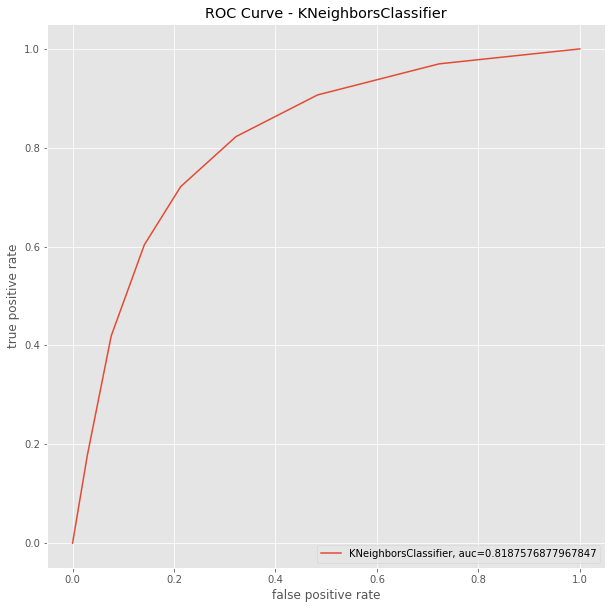

In [142]:
the_roc(knn)

### Neural Network Classifier
Multi-Layer Perceptron (MLP)

In [143]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [144]:
eval_score(y_pred,y_test,clf)

Algorithm :  MLPClassifier
Accuracy :  0.7103613018811585
Precision :  0.5777218376337319
Recall :  0.7543138866064092
F1 Score :  0.654312188168211
Cohens Kappa Score :  0.41252711736039127


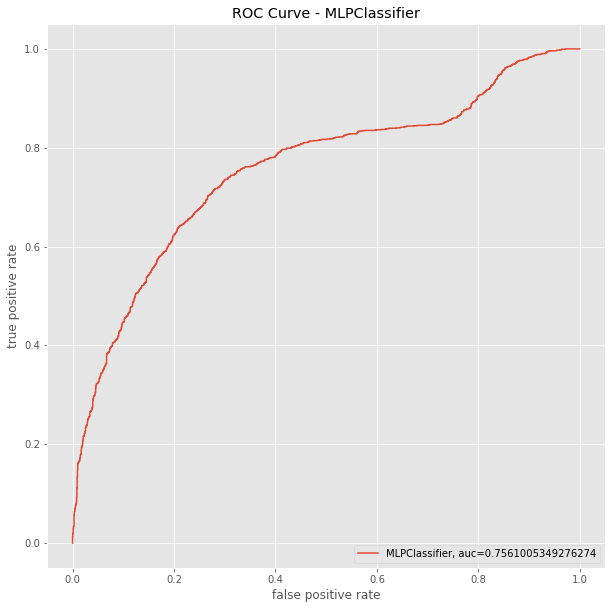

In [145]:
the_roc(clf)

### Support Vector Machine/Classifier

In [146]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
y_pred = svc.predict(x_test)

In [147]:
eval_score(y_pred,y_test,svc)

Algorithm :  SVC
Accuracy :  0.7414153478650344
Precision :  0.6337319068596602
Recall :  0.78001549186677
F1 Score :  0.6993055555555555
Cohens Kappa Score :  0.4767113855889282


### Decision tree

In [148]:
# Import Module
from sklearn import tree

# Modeling Decision Tree
dtc = tree.DecisionTreeClassifier(min_impurity_decrease=0.01)
dtc.fit(x_train, y_train)

# Predict to Test Data 
y_pred_dtc = dtc.predict(x_test)

#### Model Evaluation

In [149]:
eval_score(y_test, y_pred_dtc,dtc)

Algorithm :  DecisionTreeClassifier
Accuracy :  0.7862048372648551
Precision :  0.7609085475194262
Recall :  0.8011327879169289
F1 Score :  0.7805027590435316
Cohens Kappa Score :  0.5723901160630026


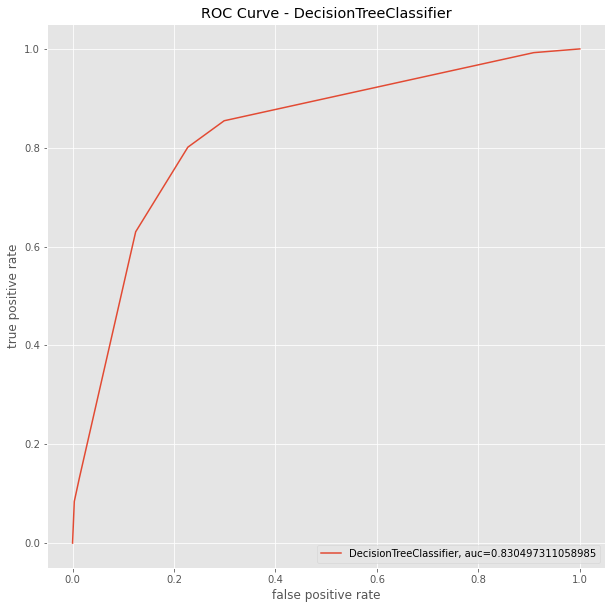

In [150]:
the_roc(dtc)

### Naive Bayes

In [151]:
# Import Module
from sklearn.naive_bayes import GaussianNB 

# Modeling Naive Bayes Classifier
gnb = GaussianNB()
gnb.fit(x_train, y_train)

# Predict to Test Data
y_pred_gnb = gnb.predict(x_test)

In [152]:
eval_score(y_test, y_pred_gnb, gnb)

Algorithm :  GaussianNB
Accuracy :  0.7393251716930427
Precision :  0.7924836601307189
Recall :  0.6104468219005664
F1 Score :  0.689655172413793
Cohens Kappa Score :  0.47138883339224513


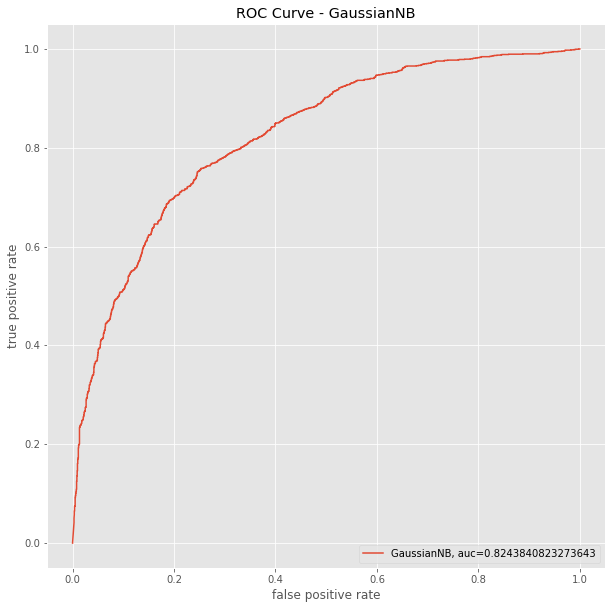

In [153]:
the_roc(gnb)

### Model Comparison

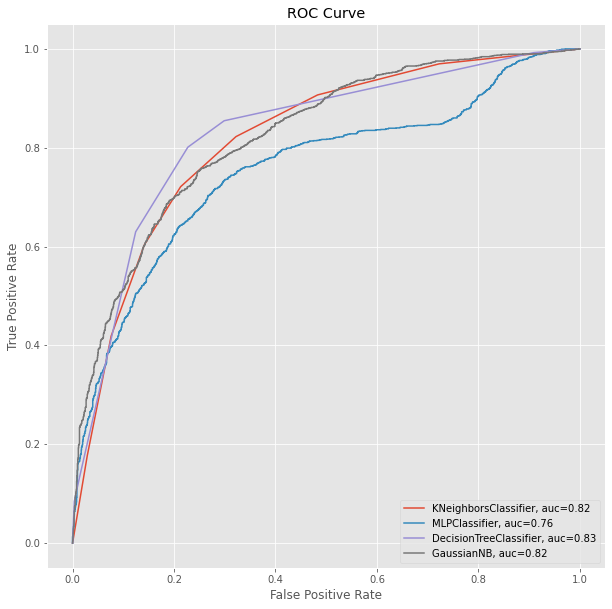

In [160]:
for i in algorithm:
    try:
        plt.plot(roc_[i]['FPR'],roc_[i]['TPR'],label=i + ", auc="+str(roc_[i]['AUC']))
    except:
        continue
        
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [162]:
auc = []
for i in algorithm:
    try:
        auc.append(roc_[i]['AUC'])
    except:
        auc.append(0)

In [163]:
df_summary = pd.DataFrame({'Algoritma' : algorithm, 'Accuracy' : acc, 'Precision' : prec, 'Recall' : rec, 'F1 Score' : f1, 'Kappa Score' : kappa, 'AUC' : auc})
df_summary

,Algoritma,Accuracy,Precision,Recall,F1 Score,Kappa Score,AUC
0,KNeighborsClassifier,0.76,0.75,0.72,0.74,0.51,0.82
1,MLPClassifier,0.71,0.58,0.75,0.65,0.41,0.76
2,SVC,0.74,0.63,0.78,0.70,0.48,0.00
3,DecisionTreeClassifier,0.79,0.76,0.80,0.78,0.57,0.83
4,GaussianNB,0.74,0.79,0.61,0.69,0.47,0.82


### Conclusion

According to the summary table, we can conclude that DecisionTreeClassifier has the highest accuracy (79 %) and MLPClassifier has the lowest accuracy (71%).

In line with its accuracy value, DecisionTreeClassifier also has the highest Recall and F1 Score values if compared to other algorithms.

However fot the precision, DecisionTreeClassifier algorithm topped the 2nd highest with a value 76% and for the most highest precision topped by the GaussianNB Algorithm with a value 79%.

If accuracy is the main matrix in this case study, so we can recommend to implement a prediction system using the **DecisionTreeClassifier** algorithm.
